In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
basedir = '/scratch/ias41/ae_code'

In [3]:
plasma_conc_initial = pd.read_csv(basedir + '/plasma_concentrations/results/molregno2median_plasma_total_unbound.txt', sep='\t')
with open(basedir + '/faers_aes/results/20200108_PSM_molregno2aes_PRR2_chi4_faers_min5drugs_all_random_controls.pkl', 'rb') as f:
    molregno2ae_faers = pickle.load(f)
with open(basedir + '/sider/results/20191215_molregno2aes_sider_min5drugs.pkl', 'rb') as f:
    molregno2ae_sider= pickle.load(f)

In [4]:
plasma_conc_initial.columns

Index(['molregno', 'chembl_id', 'pref_name',
       'median Molar total plasma concentration',
       'median pMolar total plasma concentration',
       'median Molar unbound plasma concentration',
       'median pMolar unbound plasma concentration'],
      dtype='object')

In [5]:
unbound = set(plasma_conc_initial.loc[~plasma_conc_initial['median pMolar unbound plasma concentration'].isnull(),'molregno'])
total = set(plasma_conc_initial.loc[~plasma_conc_initial['median pMolar total plasma concentration'].isnull(),'molregno'])

In [6]:
len(unbound), len(total)

(536, 756)

In [7]:
# Total and unbound overlapping with drugs from AE datasets

In [8]:
ae_datasets_drugs = molregno2ae_faers.keys() | molregno2ae_sider.keys()
len(ae_datasets_drugs)

1594

In [9]:
unbound_overlap = ae_datasets_drugs & unbound
len(unbound_overlap)

466

In [10]:
total_overlap = ae_datasets_drugs & total
len(total_overlap)

625

In [11]:
plasma_conc_ae_overlap = plasma_conc_initial.loc[plasma_conc_initial['molregno'].isin(ae_datasets_drugs)]

In [12]:
plasma_conc_ae_overlap.head()

,molregno,chembl_id,pref_name,median Molar total plasma concentration,median pMolar total plasma concentration,median Molar unbound plasma concentration,median pMolar unbound plasma concentration
0,97,CHEMBL2,PRAZOSIN,5.216348e-08,7.282633,3.129809e-09,8.504482
1,115,CHEMBL3,NICOTINE,1.849112e-07,6.733037,1.756657e-07,6.755313
2,146,CHEMBL4,OFLOXACIN,8.025016e-06,5.095554,6.018762e-06,5.220493
3,147,CHEMBL5,NALIDIXIC ACID,1.291767e-04,3.888816,1.033414e-05,4.985726
4,173,CHEMBL6,INDOMETHACIN,5.589871e-06,5.252598,5.589871e-08,7.252598


In [13]:
plasma_conc_ae_overlap.median()

molregno                                      8.020900e+04
median Molar total plasma concentration       1.677129e-06
median pMolar total plasma concentration      5.775434e+00
median Molar unbound plasma concentration     2.599571e-07
median pMolar unbound plasma concentration    6.585107e+00
dtype: float64

In [21]:
plasma_conc_ae_overlap['median pMolar unbound plasma concentration'].describe()

count    466.000000
mean       6.511338
std        1.497418
min        2.734586
25%        5.443263
50%        6.585107
75%        7.545077
max       11.112180
Name: median pMolar unbound plasma concentration, dtype: float64

In [22]:
plasma_conc_ae_overlap['median pMolar total plasma concentration'].describe()

count    625.000000
mean       5.684523
std        1.262203
min        2.611381
25%        4.792805
50%        5.775434
75%        6.530763
max       10.389742
Name: median pMolar total plasma concentration, dtype: float64

In [19]:
plasma_conc_ae_overlap['median pMolar unbound plasma concentration'].min()

2.7345860469993375

In [20]:
plasma_conc_ae_overlap['median pMolar unbound plasma concentration'].max()

11.11218032919914

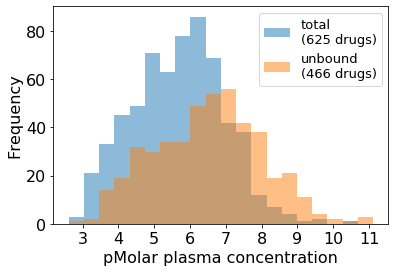

In [19]:
plt.rc('axes', labelsize=16)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
len_total = len(plasma_conc_ae_overlap.loc[~plasma_conc_ae_overlap['median pMolar total plasma concentration'].isnull(),'median pMolar total plasma concentration'])
len_unbound = len(plasma_conc_ae_overlap.loc[~plasma_conc_ae_overlap['median pMolar unbound plasma concentration'].isnull(),'median pMolar unbound plasma concentration'])
ax = pd.DataFrame(
    {f'total\n({len_total} drugs)': plasma_conc_ae_overlap.loc[~plasma_conc_ae_overlap['median pMolar total plasma concentration'].isnull(),'median pMolar total plasma concentration']
    , f'unbound\n({len_unbound} drugs)': plasma_conc_ae_overlap.loc[~plasma_conc_ae_overlap['median pMolar unbound plasma concentration'].isnull(),'median pMolar unbound plasma concentration']
    }).plot.hist(alpha=0.5, bins=20)
plt.legend(fontsize=13)
ax.set_xlabel('pMolar plasma concentration')
ax.set_xticks([3,4,5,6,7,8,9,10,11])

plt.savefig(basedir + '/plasma_concentrations/figures/plasma_conc_dist.png', dpi=200, bbox_inches='tight')

In [16]:
plasma_conc_ae_overlap['difference'] = plasma_conc_ae_overlap['median pMolar unbound plasma concentration'] - plasma_conc_ae_overlap['median pMolar total plasma concentration']

/scratch/ias41/envs/release/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
plasma_conc_ae_overlap.loc[plasma_conc_ae_overlap['difference'].isnull()]

,molregno,chembl_id,pref_name,median Molar total plasma concentration,median pMolar total plasma concentration,median Molar unbound plasma concentration,median pMolar unbound plasma concentration,difference
71,5638,CHEMBL473,DOFETILIDE,NaN,NaN,1.600000e-09,8.795880,NaN
100,10358,CHEMBL505,CHLORPHENIRAMINE,NaN,NaN,8.750000e-09,8.057992,NaN
116,12608,CHEMBL533,IBUTILIDE,NaN,NaN,1.051750e-07,6.978087,NaN
269,65351,CHEMBL850,SPARFLOXACIN,NaN,NaN,1.373500e-06,5.862171,NaN
475,469763,CHEMBL1626,CLEMASTINE,NaN,NaN,3.000000e-09,8.522879,NaN
...,...,...,...,...,...,...,...,...
758,675207,CHEMBL1201256,TRIMETHOBENZAMIDE,5.148535e-06,5.288316,NaN,NaN,NaN
759,330452,CHEMBL1396,VARENICLINE,2.366640e-08,7.625868,NaN,NaN,NaN
760,141484,CHEMBL89598,VIGABATRIN,3.484051e-04,3.457916,NaN,NaN,NaN
763,452689,CHEMBL517199,XIPAMIDE,5.636661e-05,4.248978,NaN,NaN,NaN


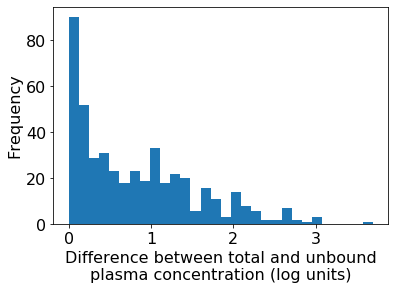

In [22]:
plt.clf()
plt.cla()
plt.close()

ax = plasma_conc_ae_overlap.loc[~plasma_conc_ae_overlap['difference'].isnull(),:]['difference'].plot.hist(bins=30)
ax.set_xlabel("Difference between total and unbound\nplasma concentration (log units)")

plt.savefig(basedir + '/plasma_concentrations/figures/plasma_unbound_total_diffs.png', dpi=200, bbox_inches='tight')